# Working notebook 1st draft $Telco Project Data$

### Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import wrangle as w

# to see all columns in wide datasets
pd.set_option('display.max_columns', None)


In [2]:
# acquire telco data 
df = w.get_telco_data()

In [3]:
df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [4]:
df.dtypes

payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

In [5]:
df.shape


(7043, 24)

In [6]:
df.total_charges.value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

# prepare

In [7]:
# cleaning data
df = w.prep_telco(df)

In [8]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,No,One year,DSL,Mailed check,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.40,No,Month-to-month,DSL,Mailed check,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.90,No,One year,DSL,Mailed check,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check,0,1,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1



df[df.contract_type != 'Month-to-month']

In [9]:
df.customer_id

0       0002-ORFBO
1       0003-MKNFE
2       0004-TLHLJ
3       0011-IGKFF
4       0013-EXCHZ
           ...    
7038    9987-LUTYD
7039    9992-RRAMN
7040    9992-UJOEL
7041    9993-LHIEB
7042    9995-HOTOH
Name: customer_id, Length: 7032, dtype: object

In [10]:
df.churn

0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
7038     No
7039    Yes
7040     No
7041     No
7042     No
Name: churn, Length: 7032, dtype: object

In [11]:
df.shape

(7032, 62)

In [12]:
def split_telco_data(df):
    '''
    This function split telco data into train , validate, test and  stratifies on churn.
    The split is 20% test 80% train/validate. Then 30% of 80% validate and 70% of 80% train.
    Aproximately (train 56%, validate 24%, test 20%)
    Returns train, validate, and test 
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

In [13]:
# split data
train, validate, test = w.split_telco_data(df)
train.shape,validate.shape, test.shape



((3937, 62), (1688, 62), (1407, 62))

In [14]:
df_predictions = pd.DataFrame(test.customer_id)

In [15]:
df_predictions

,customer_id
3311,4716-MRVEN
6330,8966-KZXXA
6156,8720-RQSBJ
5313,7504-UWHNB
1176,1730-VFMWO
...,...
600,0877-SDMBN
3946,5555-RNPGT
3230,4628-CTTLA
349,0516-QREYC


In [16]:
train.churn

5919     No
1915     No
5054     No
2355     No
6279     No
       ... 
394      No
3763    Yes
3444     No
1002     No
4192     No
Name: churn, Length: 3937, dtype: object

# plt.title('Churn Mean')
sns.barplot(x=len(train.churn_Yes), y = train.churn_Yes., data = train,ci=False,saturation=.9, palette="PuRd_r")
col_mean= train.churn.mean()
plt.axhline(col_mean, label = 'Churn mean',color='maroon')
plt.legend()
plt.show()

# How often does churn occur?

In [17]:
mean = train.churn.value_counts().mean()
mean

1968.5

In [18]:
train.churn.value_counts()

No     2891
Yes    1046
Name: churn, dtype: int64

In [19]:
def get_churn_mean_bar1(df): 
    mean = df.churn.value_counts().mean()
    plt.title(f'Churn Mean : {mean}')
    sns.countplot(df.churn)
    col_mean= df.churn.value_counts().mean()
    plt.axhline(col_mean, label = 'Churn mean',color='maroon')


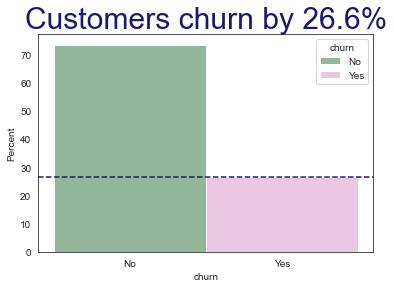

In [20]:
def get_churn_mean_bar(df):
    ''' This function takes in telco data frame and returns a histoplot that
    graphs the percentage of Telco customer who have churn'''

    sns.set_style('white')
    

    c_percent = round(df.churn.value_counts(normalize=True)[1],3)* 100
    plt.title(f'Customers churn by {c_percent}%',fontsize=30,fontweight=100,color='midnightblue')
    sns.histplot(data =df, x='churn',element='bars',stat='percent',hue='churn',palette='cubehelix',)
    col_mean= round(df.churn.value_counts(normalize=True)[1],3)* 100
    plt.axhline(col_mean, label = 'Churn Rate',color='midnightblue',linestyle='dashed')
   
    plt.show();
get_churn_mean_bar(train)

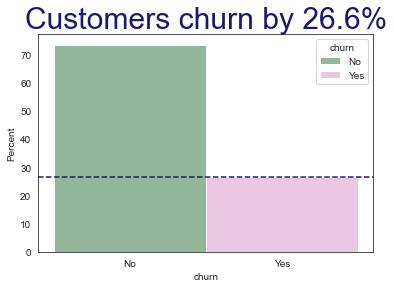

In [21]:
get_churn_mean_bar(train)



In [22]:
train.churn.value_counts(normalize=True)[1]

0.2656845313690627

### It appears that about 26% of telco customers churn.

# Baseline

In [23]:
#Find Baseline
train.churn.value_counts()
#Baseline is 0, customer did not chur

No     2891
Yes    1046
Name: churn, dtype: int64

In [24]:
#Baseline Accuracy
baseline = (train.churn == 'No').mean()
baseline

0.7343154686309372

# Does having a high monthly charge affect churn?

### I appears that monthly charges has some bearing on customer churn. Customers who have less monthly charges appear to have stayed with Telco.


In [25]:
train.monthly_charges.describe()

count    3937.000000
mean       64.805131
std        30.294804
min        18.250000
25%        34.700000
50%        70.250000
75%        90.300000
max       118.650000
Name: monthly_charges, dtype: float64

<AxesSubplot:title={'center':'Monthly Charges vs Churn'}, xlabel='monthly_charges', ylabel='Count'>

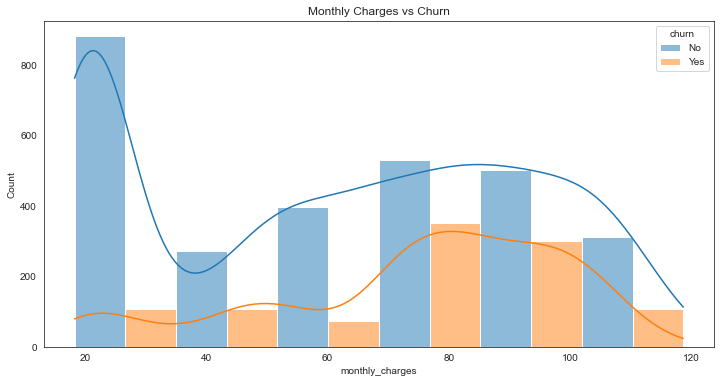

In [26]:
plt.figure(figsize=(12,6))
plt.title('Monthly Charges vs Churn')
sns.histplot(x='monthly_charges', data=train, hue='churn',multiple='dodge', kde= True, bins = 6)

In [27]:
print(sns.color_palette("cubehelix").as_hex())

['#1a2441', '#1b6145', '#697b30', '#c87b7c', '#cda2e0', '#c6e1f1']


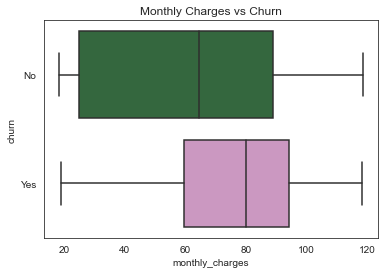

In [28]:
def get_monthly_charges(df):
    plt.title('Monthly Charges vs Churn')
    sns.boxplot(x=df.monthly_charges, y=df.churn,
                whis=np.inf, palette='cubehelix');
get_monthly_charges(train)

### Stat Test T-test

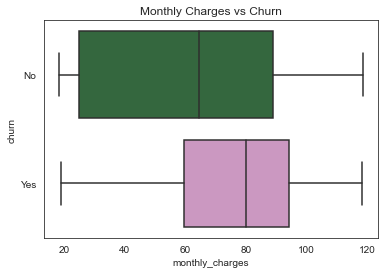

In [29]:
# Create an array with the colors you want to use
colors = ['#98b49c', '#e7c7e2']
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
get_monthly_charges(train)

In [30]:
train.churn.value_counts()

No     2891
Yes    1046
Name: churn, dtype: int64

In [31]:
train[train.churn == 'Yes']

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6992,9921-ZVRHG,Female,0,No,No,14,Yes,Yes,No,No,Yes,No,No,No,Yes,80.45,1072.00,Yes,Month-to-month,Fiber optic,Electronic check,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
6845,9722-UJOJR,Male,0,Yes,Yes,29,Yes,No,No,No,No,No,No,No,Yes,70.75,1974.80,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3171,4547-LYTDD,Female,0,No,No,16,Yes,Yes,No,No,No,No,No,No,No,72.65,1194.30,Yes,Month-to-month,Fiber optic,Electronic check,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
2375,3400-ESFUW,Male,0,Yes,Yes,55,Yes,No,Yes,Yes,No,Yes,No,No,No,57.55,3046.40,Yes,Two year,DSL,Bank transfer (automatic),0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0
4551,6416-TVAIH,Male,0,Yes,Yes,1,Yes,No,No,No,No,No,No,No,Yes,68.50,68.50,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,6680-WKXRZ,Female,0,No,No,3,Yes,Yes,No,No,No,No,No,No,No,74.40,215.80,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0
2194,3144-AUDBS,Female,0,Yes,No,6,Yes,No,No,No,No,Yes,No,No,Yes,49.15,270.80,Yes,Month-to-month,DSL,Electronic check,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0
659,0963-ZBDRN,Male,0,No,No,32,Yes,No,No,No,No,Yes,Yes,Yes,Yes,96.20,3183.40,Yes,Month-to-month,Fiber optic,Electronic check,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0
3359,4791-QRGMF,Male,0,Yes,No,59,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,99.50,5961.10,Yes,One year,Fiber optic,Bank transfer (automatic),0,1,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0


In [32]:
'''
Hypothesis 
Does monthly charges have a relationship with churn? 

Variables:
* monthly charges (continuous)
* churn(discrete)

Test: T-test two tail one sample scipy.stats.ttest_ind

$H_0$: Mean tenure of Telco customers who churn == mean tenure of Telco customers who do not churn.

$H_a$: Tean tenure of Telco customers who churn != mean tenure of Telco customers who do not churn.
'''

subset_churn =train[train.churn=='Yes']
subset_notchurn = train[train.churn =='No']

# # stats Levene test - returns p value. small p-value means unequal variances
stat, pval =stats.levene(subset_churn.monthly_charges, subset_notchurn.monthly_charges)


# high p-value suggests that the populations have equal variances

if pval < 0.05:
    print('inequal variance ==> set equl_var to False')
pval

alpha = 0.05

t_stat, p_val = stats.ttest_ind(subset_churn.monthly_charges, subset_notchurn.monthly_charges, equal_var = False)
print(f' t-stat:{stat}')
print(f' p-value:{pval}')

if pval/2 < 0.05:
    print('we can reject H0 ')
    
print(f'''
Because the p-value ({p_val}) is less than alpha value ({alpha}), we reject the null hypothesis''')

inequal variance ==> set equl_var to False
 t-stat:221.89598777895102
 p-value:7.315880114496924e-49
we can reject H0 

Because the p-value (2.460130776937842e-43) is less than alpha value (0.05), we reject the null hypothesis


In [33]:
subset_churn.shape

(1046, 62)

In [34]:
def get_ttest_monthly_charges(df):
    
    # create two independent sample group of customers: churn and not churn.
    subset_churn =df[df.churn=='Yes']
    subset_notchurn = df[df.churn =='No']

    # # stats Levene test - returns p value. small p-value means unequal variances
    stat, pval =stats.levene(subset_churn.monthly_charges, subset_notchurn.monthly_charges)


    # high p-value suggests that the populations have equal variances
    if pval < 0.05:
        variance = True
    else:
        variance = False

 
    alpha = 0.05

    t_stat, p_val = stats.ttest_ind(subset_churn.monthly_charges, subset_notchurn.monthly_charges, equal_var = True,random_state=123)
    t_stat = t_stat.round(4)
    p_val = p_val.round(4)
    print(f' t-stat:{t_stat}')
    print(f' p-value:{p_val}')

   

get_ttest_monthly_charges(train)

 t-stat:12.5961
 p-value:0.0


### REject null hypothesis there is significant difference between the means of of monthly charges of those who churn vs those who do not churn

#  Do Senior Citizens churn more than non-Senior Citizens?

In [35]:
sub_issenior = train[train.senior_citizen== 1]
sub_notsenior = train[train.senior_citizen == 0]

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


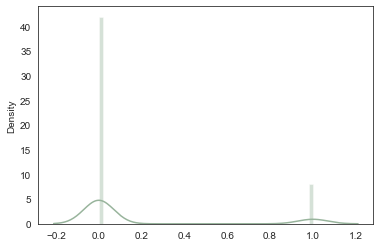

In [36]:
sns.distplot(x=train.senior_citizen,norm_hist=True,);

In [37]:
sub_issenior.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,635.0,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,1.0,33.470866,80.295591,2873.479685,0.513386,0.486614,0.494488,0.505512,0.913386,0.086614,0.086614,0.913386,0.329134,0.086614,0.584252,0.708661,0.039370,0.251969,0.533858,0.039370,0.426772,0.538583,0.039370,0.422047,0.729134,0.039370,0.231496,0.456693,0.039370,0.503937,0.423622,0.039370,0.537008,0.218898,0.781102,0.699213,0.179528,0.121260,0.239370,0.721260,0.039370,0.207874,0.207874,0.510236,0.074016
std,0.0,24.362736,23.316690,2406.294046,0.500215,0.500215,0.500364,0.500364,0.281491,0.281491,0.281491,0.281491,0.470269,0.281491,0.493239,0.454737,0.194627,0.434486,0.499246,0.194627,0.494998,0.498902,0.194627,0.494275,0.444757,0.194627,0.422121,0.498514,0.194627,0.500379,0.494522,0.194627,0.499022,0.413825,0.413825,0.458962,0.384096,0.326686,0.427035,0.448733,0.194627,0.406106,0.406106,0.500289,0.262003
min,1.0,1.000000,19.300000,19.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,10.000000,70.200000,635.350000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,31.000000,84.950000,2401.050000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.0,56.500000,97.875000,4779.575000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,72.000000,117.450000,8443.700000,1.000

In [38]:
sub_notsenior.churn.value_counts(normalize= True)

No     0.765294
Yes    0.234706
Name: churn, dtype: float64

In [39]:
sub_notsenior.churn.value_counts(normalize= True)

No     0.765294
Yes    0.234706
Name: churn, dtype: float64

In [40]:
sub_issenior.churn.value_counts(normalize = True)

No     0.573228
Yes    0.426772
Name: churn, dtype: float64

In [41]:
train.senior_citizen

5919    0
1915    0
5054    0
2355    0
6279    1
       ..
394     0
3763    0
3444    0
1002    0
4192    0
Name: senior_citizen, Length: 3937, dtype: int64

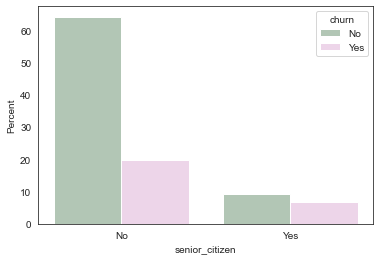

In [42]:
def senior(train): 
    senior= train.senior_citizen.map({1:'Yes', 0: 'No'})
    sns.histplot(data = train, x= senior, stat="percent", multiple="dodge", shrink=.8, hue='churn')
    plt.show()

senior(train)

In [43]:
train.senior_citizen

5919    0
1915    0
5054    0
2355    0
6279    1
       ..
394     0
3763    0
3444    0
1002    0
4192    0
Name: senior_citizen, Length: 3937, dtype: int64

<AxesSubplot:xlabel='senior_citizen', ylabel='churn'>

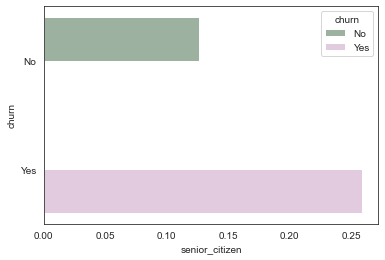

In [44]:
sns.barplot(x='senior_citizen', y="churn", hue="churn", 
                  data=train, ci=None)

<BarContainer object of 2 artists>

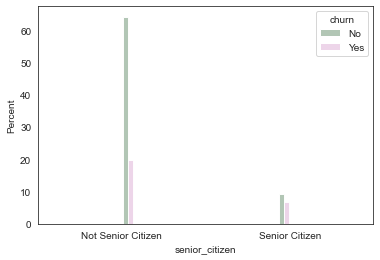

In [45]:
fig, ax = plt.subplots()
ax =sns.histplot(data = train, x= 'senior_citizen', stat="percent", multiple="dodge", shrink=.8, hue='churn')
ax.bar(['Not Senior Citizen', 'Senior Citizen'],0)


# sns.histplot(data = train, x=train.senior_citizen == 0, stat="percent")

In [46]:
train.senior_citizen.head()

5919    0
1915    0
5054    0
2355    0
6279    1
Name: senior_citizen, dtype: int64

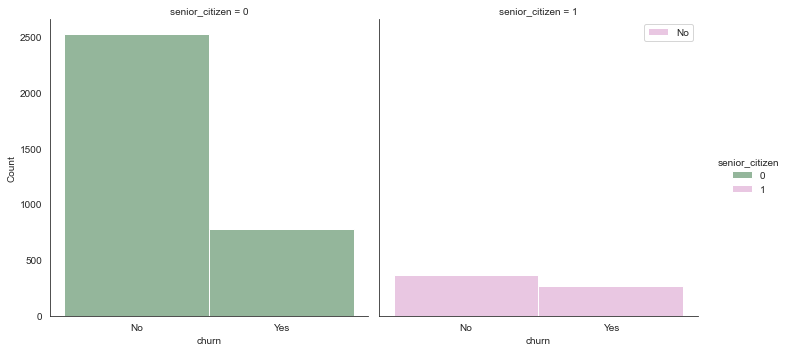

In [47]:
sns.displot(data = train, x='churn', hue ='senior_citizen', col='senior_citizen',palette= 'cubehelix')
plt.legend(train.churn)

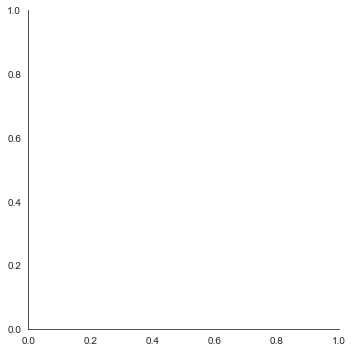

In [48]:
sns.displot()

<BarContainer object of 2 artists>

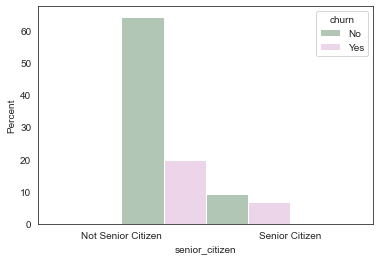

In [49]:
fig, ax = plt.subplots()
ax = sns.histplot(data = train, x= train.senior_citizen,bins=2 , stat="percent", multiple="dodge",  hue='churn')
ax.bar(['Not Senior Citizen', 'Senior Citizen'],0)
#plt.xticks(np.arange(0,4,1));


<AxesSubplot:xlabel='senior_citizen', ylabel='Percent'>

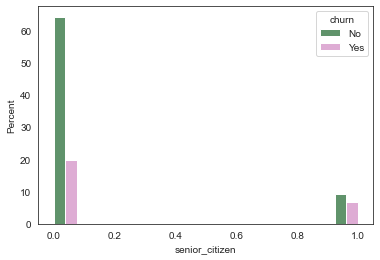

In [50]:
sns.histplot(data =train, cbar=True,x='senior_citizen',stat='percent',hue='churn', palette='cubehelix',multiple='dodge')


In [52]:
senior_no= train[senior == 'No']
senior_yes = train[senior== 'Yes']

KeyError: False

In [53]:
train[train.senior_citizen==1]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6279,8883-GRDWQ,Male,1,No,No,20,Yes,No,Yes,No,No,Yes,No,No,No,54.00,1055.90,No,One year,DSL,Mailed check,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
4372,6168-WFVVF,Female,1,No,No,3,Yes,No,No,No,No,No,No,No,Yes,70.30,235.50,Yes,Month-to-month,Fiber optic,Electronic check,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3356,4785-QRJHC,Male,1,Yes,No,46,No,No phone service,No,Yes,Yes,Yes,Yes,Yes,Yes,59.90,2816.65,Yes,One year,DSL,Bank transfer (automatic),0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0
902,1309-XGFSN,Male,1,Yes,Yes,52,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,80.85,4079.55,No,One year,DSL,Electronic check,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0
2869,4086-YQSNZ,Female,1,Yes,No,3,Yes,No,No,No,No,No,Yes,No,Yes,80.40,224.05,Yes,Month-to-month,Fiber optic,Electronic check,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,9978-HYCIN,Male,1,Yes,Yes,47,Yes,No,No,Yes,No,No,Yes,No,Yes,84.95,4018.05,No,One year,Fiber optic,Bank transfer (automatic),0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0
4080,5760-WRAHC,Female,1,No,No,22,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,69.75,1545.40,No,Month-to-month,DSL,Mailed check,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1
363,0533-BNWKF,Female,1,Yes,No,55,Yes,Yes,No,Yes,Yes,No,No,No,Yes,85.45,4874.70,Yes,Month-to-month,Fiber optic,Electronic check,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
2838,4039-PIMHX,Male,1,Yes,No,49,Yes,No,No,Yes,No,No,No,No,No,49.80,2398.40,No,Two year,DSL,Mailed check,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1


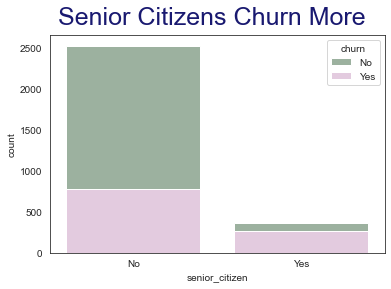

In [54]:

# change encoding of senior citizen to text
senior= train.senior_citizen.map({1:'Yes', 0: 'No'})

sns.countplot(x=senior, data=train, hue = 'churn',dodge=False)

# Title
plt.suptitle('Senior Citizens Churn More',fontsize=25,fontweight=100,color='midnightblue')
    
plt.show();
    

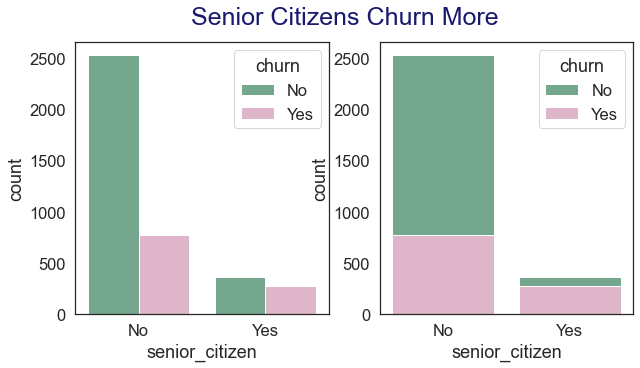

In [55]:

def get_bar_senior(df):
  
    plt.figure(figsize=(10,5))

    
    # change encoding of senior citizen to text
    senior= df.senior_citizen.map({1:'Yes', 0: 'No'})
    
    # Set your custom color palette and font size
    colors = ['#6BAF8E', '#E6AFC9']
    sns.set(font_scale=1.5)    
    sns.set_palette(sns.color_palette(colors))
    sns.set_style('white')
    
    plt.subplot(1,2,1)
    sns.countplot(x=senior, data=train, hue = 'churn')


    plt.subplot(1,2,2)
    sns.countplot(x=senior, data=train, hue = 'churn',dodge=False)

    # Title
    plt.suptitle('Senior Citizens Churn More',fontsize=25,fontweight=100,color='midnightblue')
    
    plt.show();
    
get_bar_senior(train)

### Stats Test Chi2 test

Do customers who are consider seniors churn more than customers who are not seniors?

Variables:

    * seniors (discrete)
    * churn (discrete)
    
Test: chi^2

$H_0$: There is **no** relationship between a customers with senior status and churn.

$H_a$: There is a relationship between a customers senior status and churn.

In [56]:
def get_chi2_senior(df):    
    # Chi-Square test to compare two categorical variables (senior citizen status, churn)

    alpha = 0.05

    # Setup a crosstab of observed 
    observed = pd.crosstab(df.senior_citizen== 1, train.churn)

    chi2, p, degf, expected = stats.chi2_contingency(observed)

    chi2 = chi2.round(4)
    p = p.round(4)
    print(f' Chi-Square:{chi2}')
    print(f' p-value:{p}')
    
get_chi2_senior(train)

 Chi-Square:99.7192
 p-value:0.0


In [57]:
    # Chi-Square test to compare two categorical variables (senior citizen status, churn)

    alpha = 0.05

    # Setup a crosstab of observed 
    observed = pd.crosstab(train.senior_citizen==1, train.churn)

    chi2, p, degf, expected = stats.chi2_contingency(observed)

    if p < alpha:
        print("Reject the null hypothesis")

    else:
        print("Fail to reject the null")
        print("Insufficient evidence to reject the null")
    chi2,p

Reject the null hypothesis


(99.71917005784367, 1.7561315684822695e-23)

### Since we reject the null hypethesis there seems an significant association between customers who are senior citizens and churn.

# Does tenure affect churn?

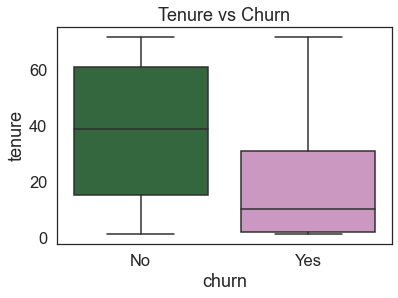

In [58]:
def get_boxplot_tenure(df):    
    plt.title('Tenure vs Churn')
    sns.boxplot(y=df.tenure, x=df.churn,palette='cubehelix',whis=np.inf);
get_boxplot_tenure(train)

<AxesSubplot:title={'center':'Tenure vs Churn'}, xlabel='churn', ylabel='tenure'>

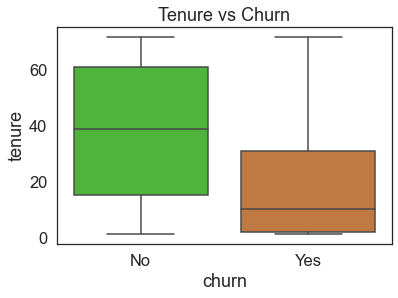

In [59]:
plt.title('Tenure vs Churn')
sns.boxplot(y=train.tenure, x=train.churn,saturation=.5,palette='gist_ncar',
            whis=np.inf
           )

### Stats Test T-test

In [60]:
'''
Hypothesis 
Does tenure have a relationship with churn? 

Variables:
* tenure (continuous)
* churn(discrete)

Test: T-test two tail one sample scipy.stats.ttest_ind

$H_0$: Mean tenure of Telco customers who churn == mean tenure of Telco customers who do not churn.

$H_a$: Tean tenure of Telco customers who churn != mean tenure of Telco customers who do not churn.
'''
subset_churn =train[train.churn=='Yes']
subset_notchurn = train[train.churn =='No']

# # stats Levene test - returns p value. small p-value means unequal variances
stats.levene(subset_churn.tenure, subset_notchurn.tenure)

# high p-value suggests that the populations have equal variances

if pval < 0.05:
    print('inequal variance ==> set equl_var to False')
else:
    print('False')
pval

alpha = 0.05

t_stat, p_val = stats.ttest_ind(subset_churn.tenure, subset_notchurn.tenure, equal_var = False,random_state=123)

print(f' t-stat:{t_stat}')
print(f' p-value:{p_val}')

if pval < 0.05:
    print('we can reject H0 ')
    
print(f'''
Because the p-value ({p_val}) is less than alpha value ({alpha}), we reject the null hypothesis''')

inequal variance ==> set equl_var to False
 t-stat:-25.770004822356352
 p-value:2.352878533952399e-128
we can reject H0 

Because the p-value (2.352878533952399e-128) is less than alpha value (0.05), we reject the null hypothesis


In [61]:
# Second Go_______________________
'''
Hypothesis 
Do customers who churn have lower tenure?

Variables:
* tenure (continuous)
* churn(discrete)

Test: T-test one tail one sample scipy.stats.ttest_ind

$H_0$: Mean tenure of Telco customers who churn >= mean tenure of Telco customers who do not churn.

$H_a$: Tean tenure of Telco customers who churn < mean tenure of Telco customers who do not churn.
'''
subset_churn =train[train.churn=='Yes']
subset_notchurn = train[train.churn =='No']

# # stats Levene test - returns p value. small p-value means unequal variances
stats.levene(subset_churn.tenure, subset_notchurn.tenure)

# high p-value suggests that the populations have equal variances

if pval < 0.05:
    print('inequal variance ==> set equl_var to False')
else:
    print('False')
pval

alpha = 0.05

t_stat, p_val = stats.ttest_ind(subset_churn.tenure, subset_notchurn.tenure, equal_var = False,random_state=123)

print(f' t-stat:{t_stat}')
print(f' p-value:{p_val}')

if pval/2 < 0.05:
    print('we can reject H0 ')
    
print(f'''
Because the p-value ({p_val}) is less than alpha value ({alpha}), we reject the null hypothesis''')

inequal variance ==> set equl_var to False
 t-stat:-25.770004822356352
 p-value:2.352878533952399e-128
we can reject H0 

Because the p-value (2.352878533952399e-128) is less than alpha value (0.05), we reject the null hypothesis


In [62]:
def get_ttest_tenure(df):
    
    # create two independent sample group of customers: churn and not churn.
    subset_churn =df[df.churn=='Yes']
    subset_notchurn = df[df.churn =='No']

    # # stats Levene test - returns p value. small p-value means unequal variances
    stat, pval =stats.levene(subset_churn.tenure, subset_notchurn.tenure)


    # high p-value suggests that the populations have equal variances
    if pval < 0.05:
        variance = False
        print('False')
    else:
        variance = True
        print('True')

 
    alpha = 0.05

    t_stat, p_val = stats.ttest_ind(subset_churn.tenure, subset_notchurn.tenure, equal_var = variance,random_state=123)
    #t_stat = t_stat.round(4)
    #p_val = p_val.round(4)
    print(f' t-stat:{t_stat}')
    print(f' p-value:{p_val}')


In [63]:
get_ttest_tenure(train)

False
 t-stat:-25.770004822356352
 p-value:2.352878533952399e-128


### Since we reject the null hypothesis there appears to be a significant difference in the tenure means of customers who churn and those who do not churn

# Does the contract type of customer affect churn?

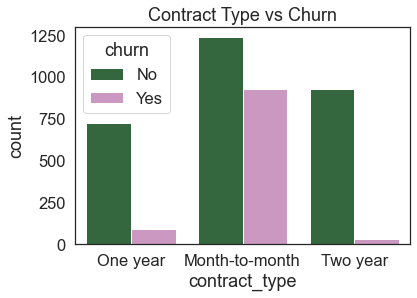

In [64]:
plt.title('Contract Type vs Churn')
sns.countplot(x=train.contract_type, data=train, hue = 'churn',palette='cubehelix');


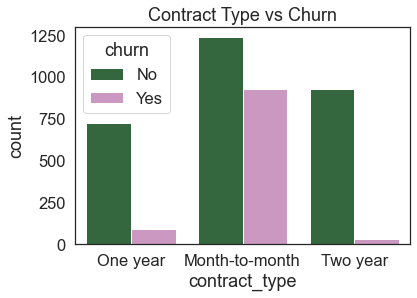

In [65]:
def get_plot_contract(df):
    plt.title('Contract Type vs Churn')
    sns.countplot(x=train.contract_type, data=train, hue = 'churn',palette='cubehelix');
get_plot_contract(train)

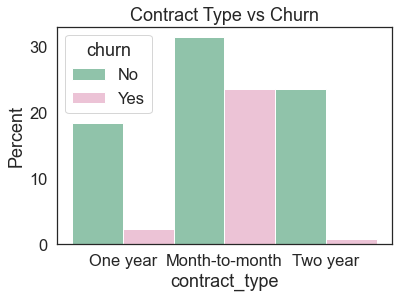

In [66]:
plt.title('Contract Type vs Churn')
sns.histplot(data = train, x=train.contract_type, stat="percent", hue = 'churn', multiple = 'dodge');

In [67]:
train.contract_type.value_counts()

Month-to-month    2165
Two year           957
One year           815
Name: contract_type, dtype: int64

In [68]:
pd.crosstab(train.contract_type, train.churn)

churn,No,Yes
contract_type,,
Month-to-month,1238,927
One year,726,89
Two year,927,30


### Stats TEST Chi2

In [69]:
# Chi-Square test to compare two categorical variables (Contract type vs Churn)

alpha = 0.05

# Setup a crosstab of observed 
observed = pd.crosstab(train.contract_type, train.churn)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p, chi2

Reject the null hypothesis


(4.693667062132269e-145, 664.6572486352288)

In [70]:
def get_chi2_contract(df):    
    # Chi-Square test to compare two categorical variables (contract type, churn)
    # Set alpha to 0.05
    alpha = 0.05

    # Setup a crosstab of observed 
    observed = pd.crosstab(df.contract_type, df.churn)
    
    # Run chi-square test
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    # Round and Print Results
    chi2 = chi2.round(4)
    p = p.round(4)
    print(f' Chi-Square:{chi2}')
    print(f' p-value:{p}')
    
get_chi2_contract(train)

 Chi-Square:664.6572
 p-value:0.0


### There appears to be a significant association between contract type and churn

# Do Senior Citizens pay more monthly charges that non Senior Citizens?

<AxesSubplot:title={'center':'High monthly charges Drive Senior Citizens to Churn'}, xlabel='senior_citizen', ylabel='monthly_charges'>

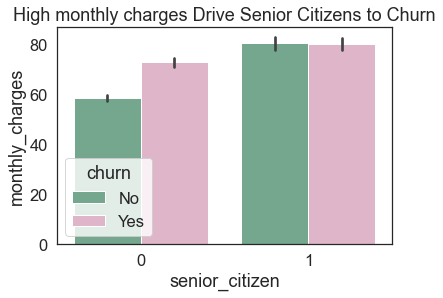

In [71]:
plt.title('High monthly charges Drive Senior Citizens to Churn')
sns.barplot(data= train, x='senior_citizen', y='monthly_charges', hue = 'churn')

Hypothesis for Senior citizens and Monthly charges
Do customers who are consider seniors pay more monthly charges than customers who are not seniors? 

Variables:
* seniors (discrete)
* month charges(continuous)

Test: two sample, one tail, scipy.stats.ttest_ind

$H_0$: The mean monthly charges for senior citizens <= to the mean monthly charges of non senior citizens.

$H_a$: The mean monthly charges for senior citizens <= to the mean monthly charges of non senior citizens.

In [72]:
total_charges_seniors = train[train.senior_citizen==1].total_charges
total_charges_nonseniors = train[train.senior_citizen==0].total_charges

In [73]:
total_charges_seniors.var(),total_charges_nonseniors.var()

(5790251.037615047, 5042349.88999738)

In [74]:
# # stats Levene test - returns p value. small p-value means unequal variances
stat, pval = stats.levene(total_charges_seniors, total_charges_nonseniors)

# high p-value suggests that the populations have equal variances

if pval < 0.05:
    print('inequal variance ==> set equal_var to False')
pval

inequal variance ==> set equal_var to False


3.1878395780060806e-05

In [75]:
alpha = 0.05

t_stat, p_val = stats.ttest_ind(total_charges_seniors, total_charges_nonseniors, equal_var = False)
print(f' t-stat:{stat}')
print(f' p-value:{pval}')

if pval/2 < 0.05:
    print('we can reject H0 ')
    
print(f'''
Because the p-value ({p_val}) is less than alpha value ({alpha}), we reject the null hypothesis''')

 t-stat:17.342703226071816
 p-value:3.1878395780060806e-05
we can reject H0 

Because the p-value (2.0722062265570932e-10) is less than alpha value (0.05), we reject the null hypothesis


### Summary:
### Since we reject the null hypothesis, there seems to be significant findings that senior citizens on average do pay more Monthly Charges than non senior citizens.m

# Does gender influence churn?

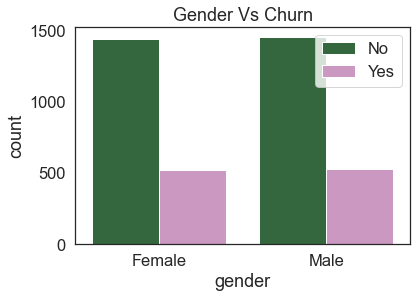

In [76]:
plt.title('Gender Vs Churn')
sns.countplot(x=train.gender, data=train, hue = 'churn', palette='cubehelix')

plt.legend()
plt.show()

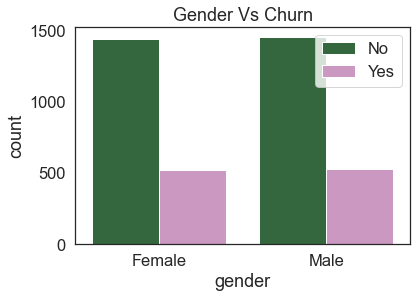

In [77]:
def get_plot_gender(df):   
    plt.title('Gender Vs Churn')
    sns.countplot(x=df.gender, data=df, hue = 'churn', palette='cubehelix')

    plt.legend()
    plt.show();
get_plot_gender(train)

There does not seem to be a relationhip between churn and gender

### Stats Test Chi2

In [78]:
'''
Hypothesis 
Gender vs churn

Variables:
* gender(discrete)
* churn(discrete)

Test: 

$H_0$: There is **no** relationship between a customers and tenure.

$H_a$: There is a relationship between a customers and tenure.
'''
    
print (pd.crosstab(train.contract_type, train.churn))

# Chi-Square test to compare two categorical variables (Sex and Survival)


alpha = 0.05

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.gender, train.churn)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p,chi2

churn             No  Yes
contract_type            
Month-to-month  1238  927
One year         726   89
Two year         927   30
Fail to reject the null
Insufficient evidence to reject the null


(1.0, 0.0)

In [79]:
def get_chi2_gender(df):    
    # Chi-Square test to compare two categorical variables (gender, churn)
    # Set alpha to 0.05
    alpha = 0.05

    # Setup a crosstab of observed 
    observed = pd.crosstab(df.gender, df.churn)
    
    # Run chi-square test
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    # Round and Print Results
    chi2 = chi2.round(4)
    p = p.round(4)
    print(f' Chi-Square:{chi2}')
    print(f' p-value:{p}')
    
get_chi2_gender(train)

 Chi-Square:0.0
 p-value:1.0


WE fail to reject the null hypothesis so threre is no association between gender and churn

### It does not appear like gender has and influence on churn

# Does partner affect the churn?

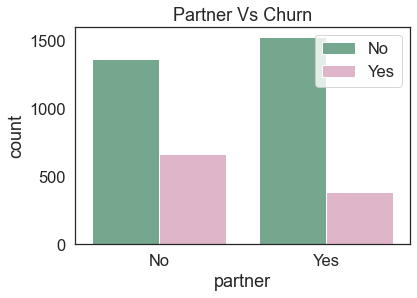

In [80]:
plt.title('Partner Vs Churn')
sns.countplot(x=train.partner, data=train, hue = 'churn')

plt.legend()
plt.show()

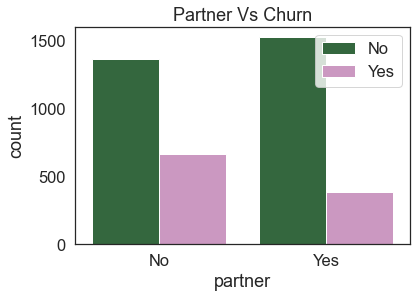

In [81]:
def get_plot_partner(df):    
    plt.title('Partner Vs Churn')
    sns.countplot(x=df.partner, data=df, hue = 'churn', palette='cubehelix')

    plt.legend()
    plt.show();
    
get_plot_partner(train)

### There seems to be a relationship between partner and churn

# Stats Test Chi2

In [82]:
'''
Hypothesis 
partner vs churn

Variables:
* partner(discrete)
* churn(discrete)

Test: 

$H_0$: There is **no** relationship between a customers and partner

$H_a$: There is a relationship between a customers and partner.
'''
    
print (pd.crosstab(train.partner, train.churn))

# Chi-Square test to compare two categorical variables (Sex and Survival)


alpha = 0.05

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.partner, train.churn)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

churn      No  Yes
partner           
No       1364  663
Yes      1527  383
Reject the null hypothesis


3.578598859815084e-19

In [83]:
def get_chi2_partner(df):    
    # Chi-Square test to compare two categorical variables (gender, churn)
    # Set alpha to 0.05
    alpha = 0.05

    # Setup a crosstab of observed 
    observed = pd.crosstab(df.partner, df.churn)
    
    # Run chi-square test
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    # Round and Print Results
    chi2 = chi2.round(4)
    p = p.round(4)
    print(f' Chi-Square:{chi2}')
    print(f' p-value:{p}')
    
get_chi2_partner(train)

 Chi-Square:80.0893
 p-value:0.0


### WE reject the null hypothesis so there is an association between partner anc churn

# Exploration Summary
* Monthly Charges is a driver of churn
* Senior Citizen status is a driver of churn
* Tenure is a driver of churn
* Contract type is a driver of churn
* Partner is a driver of churn
* Gender is not a driver of churn



# Features that will be included in my model

* Monthly charges  has a significant statistical relationship to churn
* Senior Citizen  has a significant statistical relationship to churn
* Tenure  has a significant statistical relationship to churn
* Contract type has a significan statistical relationship to churn
* Partner  has a significant statistical relationship to churn

# Features that will not be included in my model

* Gender did not have a statistical significant relationship to churn.
* Other features have unknow significance to churn at the moment
    * given more time to I would determined significance to churn.

# Modeling

* Accuracy is the metric use in the models
* Churn customers makeup 26.5% of the data 
* by guessing non-churn for every customer one could achieve an accuracy of 73.5%
* 73.5% will be the baseline accuracy I use for this project 

* I will be evaluating models developed using four different model types and various hyperparameter configurations

* Models will be evaluated on train and validate data

* The model that performs the best will then be evaluated on test data

In [84]:
train.columns.to_list()

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'gender_Female',
 'gender_Male',
 'partner_No',
 'partner_Yes',
 'dependents_No',
 'dependents_Yes',
 'phone_service_No',
 'phone_service_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming

In [85]:
def model_prep(train,validate,test):
    
        # drop unused columns 
        features = ['monthly_charges','senior_citizen','tenure','partner_No','partner_Yes','churn','contract_type_Month-to-month','contract_type_One year','contract_type_Two year']

        train = train[features]
        validate = validate[features]
        test = test[features]
        
       

        
        #seperate target
        
         
        x_train = train.drop(columns=['churn'])
        y_train = train.churn

        x_validate = validate.drop(columns=['churn'])
        y_validate = validate.churn

        x_test = test.drop(columns=['churn'])
        y_test = test.churn
        
        # Convert binary categorical targer variable to numeric
        y_train.churn= train.churn.map({'Yes': 1, 'No': 0})
        y_validate.churn = validate.churn.map({'Yes': 1, 'No': 0})
        y_test.churn = test.churn.map({'Yes': 1, 'No': 0})
        
       

        return x_train,y_train,x_validate,y_validate, x_test, y_test

In [86]:
# prep data for modeling
x_train,y_train,x_validate,y_validate, x_test, y_test = model_prep(train,validate,test)

In [87]:
x_train.shape, x_validate.shape, x_test.shape

((3937, 8), (1688, 8), (1407, 8))

# Decision Tree

In [88]:
DecisionTreeClassifier?


In [89]:

metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(x_train, y_train)
    
    out_of_sample_accuracy = tree.score(x_validate, y_validate)

    output = {
        "i": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df_2 = pd.DataFrame(metrics)
df_2["difference"] = df_2.train_accuracy - df_2.validate_accuracy
df_2

,i,train_accuracy,validate_accuracy,difference
0,1,0.734315,0.734005,0.000311
1,2,0.759462,0.735782,0.023680
2,3,0.789942,0.776659,0.013283
3,4,0.792482,0.776066,0.016415
4,5,0.796546,0.777251,0.019294
5,6,0.806706,0.778436,0.028270
6,7,0.818136,0.767773,0.050363
7,8,0.826264,0.764218,0.062046
8,9,0.842012,0.755924,0.086088
9,10,0.857760,0.751777,0.105982


In [90]:
df_2[df_2.train_accuracy > .77]

,i,train_accuracy,validate_accuracy,difference
2,3,0.789942,0.776659,0.013283
3,4,0.792482,0.776066,0.016415
4,5,0.796546,0.777251,0.019294
5,6,0.806706,0.778436,0.028270
6,7,0.818136,0.767773,0.050363
7,8,0.826264,0.764218,0.062046
8,9,0.842012,0.755924,0.086088
9,10,0.857760,0.751777,0.105982
10,11,0.876556,0.735782,0.140774
11,12,0.896368,0.739929,0.156439


### Decision Tree Best Model

In [91]:
# for decision tree the best model has  max_depth of 3.
# 3	0.789942	0.776659	0.01328
tree = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree = tree.fit(x_train, y_train)

In [92]:
Accuracy of Decision Tree on train data is 0.789942
Accuracy of Decision Tree on validate data is 0.776659

SyntaxError: invalid syntax (1641063432.py, line 1)

In [93]:
Decision Tree accuracy is about 

SyntaxError: invalid syntax (1963312294.py, line 1)

In [94]:
def get_tree_model(x_train,y_train,x_validate,y_validate):
    ''' This function takes in train data and validate data and returns models accuracy score.
        Train data  is used tofit Decision Tree Model. Both train and validate data is used
        to return the accuracy score of the Decision Tree Model
    '''
    
    tree = DecisionTreeClassifier(max_depth=3, random_state=123)
    tree = tree.fit(x_train, y_train)
    print(f"Accuracy of Decision Tree on train data is {tree.score(x_train, y_train)}")
    print(f"Accuracy of Decision Tree on validate data is {tree.score(x_validate, y_validate)}")

get_tree_model(x_train,y_train,x_validate,y_validate)

Accuracy of Decision Tree on train data is 0.7899415798831597
Accuracy of Decision Tree on validate data is 0.7766587677725119


# Random Forest

In [95]:
metrics=[]
for h in range(10,0,-1):
   
    print(f'max depth {h}')
    
    for i in range(1, 21):
  
    # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)
    
    # Fit the model (on train and only train)
        random_forest.fit(x_train, y_train)
        
         # Use the model
    # We'll evaluate the model's performance on train, first
        in_sample_accuracy = random_forest.score(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
        y_pred = random_forest.predict(x_train)
        
        output = {
        "max_depth": h,
        "min_samples_leaf": i,
        "train_accuracy": in_sample_accuracy,
        #"validate_accuracy": y_pred
    }

        metrics.append(output)
        
        df = pd.DataFrame(metrics)
df
  
 

max depth 10
max depth 9
max depth 8
max depth 7
max depth 6
max depth 5
max depth 4
max depth 3
max depth 2
max depth 1


,max_depth,min_samples_leaf,train_accuracy
0,10,1,0.880366
1,10,2,0.860808
2,10,3,0.850140
3,10,4,0.846838
4,10,5,0.844044
...,...,...,...
195,1,16,0.734315
196,1,17,0.734315
197,1,18,0.734315
198,1,19,0.734315


In [96]:
df[df.train_accuracy >.85]

,max_depth,min_samples_leaf,train_accuracy
0,10,1,0.880366
1,10,2,0.860808
2,10,3,0.850140
20,9,1,0.852426


In [97]:
metrics=[]
for h in range(10,0,-1):
   
    print(f'max depth {h}')
    
    for i in range(1, 21):
  
    # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)
    
    # Fit the model (on train and only train)
        random_forest = random_forest.fit(x_train, y_train)
        
         # Use the model
    # We'll evaluate the model's performance on train, first
        in_sample_accuracy = random_forest.score(x_train, y_train)
        
    
        out_of_sample_accuracy = random_forest.score(x_validate, y_validate)


    # Use the model
    # We'll evaluate the model's performance on train, first
        y_pred = random_forest.predict(x_train)
        
        output = {
        "max_depth": h,
        "min_samples_leaf": i,
        "train_accuracy": in_sample_accuracy,
         "validate_accuracy": out_of_sample_accuracy   
      
    }

        metrics.append(output)
        
        df_2 = pd.DataFrame(metrics)



        df_2["difference"] = df_2.train_accuracy - df_2.validate_accuracy
df_2

max depth 10
max depth 9
max depth 8
max depth 7
max depth 6
max depth 5
max depth 4
max depth 3
max depth 2
max depth 1


,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,10,1,0.880366,0.775474,0.104892
1,10,2,0.860808,0.777844,0.082964
2,10,3,0.850140,0.773104,0.077035
3,10,4,0.846838,0.771919,0.074918
4,10,5,0.844044,0.774882,0.069162
...,...,...,...,...,...
195,1,16,0.734315,0.734005,0.000311
196,1,17,0.734315,0.734005,0.000311
197,1,18,0.734315,0.734005,0.000311
198,1,19,0.734315,0.734005,0.000311


In [98]:
df_2[df_2.difference<.01]

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
160,2,1,0.743967,0.736374,0.007593
161,2,2,0.743967,0.736374,0.007593
162,2,3,0.743967,0.736374,0.007593
163,2,4,0.743967,0.736374,0.007593
164,2,5,0.743967,0.736374,0.007593
165,2,6,0.743967,0.736374,0.007593
166,2,7,0.743967,0.736374,0.007593
167,2,8,0.743967,0.736374,0.007593
168,2,9,0.743967,0.736374,0.007593
169,2,10,0.743967,0.736374,0.007593


In [99]:
df_2[df_2.validate_accuracy>.784]

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
45,8,6,0.828296,0.784953,0.043343
48,8,9,0.821438,0.784360,0.037077


### Best Model Random Forest

In [100]:
#Random Forest best model validate on Accuracy data0.020737
# Make the model 8	9	0.821438	0.784360	0.037077
random_forest = RandomForestClassifier(max_depth=8, min_samples_leaf = 9 , random_state=123)
    
# Fit the model (on train and only train)
random_forest = random_forest.fit(x_train, y_train)

In [101]:
def get_random_forest_model(x_train,y_train,x_validate,y_validate):
    ''' This function takes in train data and validate data and returns models accuracy score.
        Train data  is used to fit Random Forest Model. Both train and validate data is used
        to return the accuracy score of the Random Forest Model
    '''
    
    # Set Random Forest Model parameters
    random_forest = RandomForestClassifier(max_depth=9, min_samples_leaf = 1 , random_state=123)
   
    # Use train data to fit Random Forest model
    random_forest = random_forest.fit(x_train, y_train)
    
    print(f"Accuracy of Decision Tree on train data is {random_forest.score(x_train, y_train)}")
    print(f"Accuracy of Decision Tree on validate data is {random_forest.score(x_validate, y_validate)}")

get_random_forest_model(x_train,y_train,x_validate,y_validate)

Accuracy of Decision Tree on train data is 0.8524257048514097
Accuracy of Decision Tree on validate data is 0.7813981042654028


# KNN

In [102]:

metrics = []

for i in range(1,30):
    KNN = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    KNN.fit(x_train, y_train)
    
    model_accuracies = {
        'neighbor': i,
        'train_score': KNN.score(x_train, y_train),
        'validate_score': KNN.score(x_validate, y_validate)}
    
    metrics.append(model_accuracies)
    df = pd.DataFrame(metrics)


df

,neighbor,train_score,validate_score
0,1,0.988570,0.716232
1,2,0.867158,0.747038
2,3,0.861570,0.734005
3,4,0.838710,0.762441
4,5,0.836170,0.749408
5,6,0.827788,0.765403
6,7,0.828042,0.763626
7,8,0.821946,0.766588
8,9,0.821692,0.768957
9,10,0.816612,0.768957


In [103]:
df.train_score-df.validate_score

0     0.272338
1     0.120120
2     0.127565
3     0.076269
4     0.086762
5     0.062385
6     0.064416
7     0.055358
8     0.052734
9     0.047654
10    0.040713
11    0.043168
12    0.043845
13    0.036056
14    0.036396
15    0.033771
16    0.032502
17    0.030638
18    0.026406
19    0.030045
20    0.022766
21    0.027083
22    0.022767
23    0.024036
24    0.021412
25    0.024205
26    0.021580
27    0.023358
28    0.017686
dtype: float64

# Best Model KNN

In [104]:
#6	0.82	0.77 validate accuracy
#10 	11	0.813056	0.773697

KNN = KNeighborsClassifier(n_neighbors=11)
KNN.fit(x_train, y_train)

# 24	25	0.801626	0.780213
KNN = KNeighborsClassifier(n_neighbors=25, algorithm='brute')
KNN.fit(x_train, y_train)


KNeighborsClassifier(algorithm='brute', n_neighbors=25)

In [113]:
def get_knn_model(x_train,y_train,x_validate,y_validate):
    ''' This function takes in train data and validate data and returns the models accuracy score.
        Train data  is used to fit the KNN Model. Both train and validate data is used
        to return the accuracy score of for the KNN Model
    '''
    
    # Set Random Forest Model parameters
    KNN = KNeighborsClassifier(n_neighbors=25, algorithm='brute')
   
    # Use train data to fit Random Forest model
    KNN.fit(x_train, y_train)
    
    print(f'Accuracy of Decision Tree on train data is {KNN.score(x_train, y_train)} about {round(KNN.score(x_train, y_train)*100)}%')
    print(f'Accuracy of Decision Tree on validate data is {KNN.score(x_validate, y_validate)} about {round(KNN.score(x_validate, y_validate)*100)}%')

get_knn_model(x_train,y_train,x_validate,y_validate)

Accuracy of Decision Tree on train data is 0.8016256032512065 about 80%
Accuracy of Decision Tree on validate data is 0.7802132701421801 about 78%


* 

# Logistic Regression

In [106]:
# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=123)

In [107]:
#  fit the model on train data 
logit.fit(x_train, y_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, random_state=123)

In [108]:
y_pred = logit.predict(x_train)

# classification report for Model 2 using train data
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

          No       0.83      0.90      0.86      2891
         Yes       0.63      0.49      0.56      1046

    accuracy                           0.79      3937
   macro avg       0.73      0.70      0.71      3937
weighted avg       0.78      0.79      0.78      3937



In [109]:
y_p = logit.predict(x_validate)

# classification report for Model 2 using train data
print(classification_report(y_validate, y_p))

              precision    recall  f1-score   support

          No       0.83      0.88      0.85      1239
         Yes       0.60      0.50      0.55       449

    accuracy                           0.78      1688
   macro avg       0.71      0.69      0.70      1688
weighted avg       0.77      0.78      0.77      1688



In [110]:
# best model .78  on validate,
logit = LogisticRegression(C=1, random_state=123)

In [111]:
def get_logit_model(x_train,y_train,x_validate,y_validate):
    ''' This function takes in train data and validate data and returns the models accuracy score.
        Train data  is used to fit the Logistic Regression Model. Both train and validate data is used
        to return the accuracy score of for the Logistic Regression Model
    '''
    
    # Define the logistic regression model
    logit = LogisticRegression(C=1,random_state=123)
   
   
    # Use train data to fit Logistic Regression model
    logit.fit(x_train, y_train)
    
    diff = logit.score(x_train, y_train)-logit.score(x_validate, y_validate)
    
    print(f'Accuracy of Decision Tree on train data is {logit.score(x_train, y_train)} about {int(round(logit.score(x_train, y_train)*100,2)}%')
    print(f'Accuracy of Decision Tree on validate data is {logit.score(x_validate, y_validate)} about {round(logit.score(x_validate, y_validate)*100,2)}%')
    print(f'Difference: {round(diff,4)}')
    
get_logit_model(x_train,y_train,x_validate,y_validate)

Accuracy of Decision Tree on train data is 0.7896875793751588 about 78.97%
Accuracy of Decision Tree on validate data is 0.7784360189573459 about 77.84%
Difference: 0.0113


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
# Define the logistic regression model
logit = LogisticRegression(C=1, solver='s',random_state=123)
#  fit the model on train data usingfeatures 
logit.fit(x_train, y_train)

y_pred = logit.predict(x_train)

# classification report for Model 2 using train data
print(classification_report(y_train, y_pred))

y_p = logit.predict(x_validate)

# classification report for Model 2 using train data
print(classification_report(y_validate, y_p))

ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got s.